In [ ]:
#First we will be importing the dataset as a tar file
!wget -cq https://storage.googleapis.com/ai4bharat-public-indic-nlp-corpora/indiccorp/hi.tar.xz

In [ ]:
#Now we'll be expanding tar now
import tarfile #Importing the file
tar=tarfile.open("hi.tar.xz")
tar.extractall()
tar.close()

In [ ]:
!rm -r hi.tar.xz #To delete tar files as they are not of any use now

In [ ]:
# Setup
!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git
!pip install indic-nlp-library
import sys
from indicnlp import common
# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"indic_nlp_library"
# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"indic_nlp_resources"
# Add library to Python path
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))
# Set environment variable for resources folder
common.set_resources_path(INDIC_NLP_RESOURCES)

from collections import Counter

fatal: destination path 'indic_nlp_library' already exists and is not an empty directory.
fatal: destination path 'indic_nlp_resources' already exists and is not an empty directory.


In [ ]:
#Now, we'll carry out the word bigram process
from indicnlp.tokenize.indic_tokenize import trivial_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
lang = 'hi'
tokendict2 = {}
normalizer_factory = IndicNormalizerFactory()
normalizer = normalizer_factory.get_normalizer(lang)
linecount = 0
with open("data/hi/hi.txt", 'r', encoding='utf-8') as in_fp:
    for line in in_fp:
        linecount += 1
        sent = line.rstrip('\n')
        normalized = normalizer.normalize(sent)
        processed = ' '.join(trivial_tokenize(normalized, lang))
        # tokendict += Counter(processed.split())
        words_in_sentence = processed.split()
        for i in range(1, len(words_in_sentence)):
            ptok = words_in_sentence[i-1] + ' ' + words_in_sentence[i]
            if ptok in tokendict2.keys():
                tokendict2[ptok] += 1
            else:
                tokendict2[ptok] = 1
        if(linecount == 1000000):
            # print(linecount)
            tempdict = {key:val for key, val in tokendict2.items() if val >= 100}
            tokendict2 = tempdict
            linecount = 0

In [ ]:
c=Counter(tokendict2)
c.most_common(100)

[('है ।', 19792620),
 ('के लिए', 9123415),
 ('हैं ।', 7420130),
 ('. .', 7132228),
 ('है .', 5635527),
 ('है कि', 5274931),
 ('है ,', 4217251),
 ('के साथ', 3832249),
 ('कहा कि', 3380982),
 ('के बाद', 3084349),
 ('था ।', 2760026),
 ('रहा है', 2538576),
 ('ने कहा', 2486124),
 ('हैं .', 2402282),
 ('गया है', 2343733),
 ('रहे हैं', 2183022),
 ('है और', 2118392),
 ('हैं ,', 2013780),
 ('करने के', 1874692),
 ('रही है', 1847323),
 ('थी ।', 1672057),
 ('थे ।', 1614377),
 ('जाता है', 1563678),
 ('गया ।', 1514689),
 ('किया गया', 1465801),
 ('सकता है', 1392690),
 ('नहीं है', 1374148),
 ('बताया कि', 1348942),
 ('होता है', 1337458),
 ('कर दिया', 1310192),
 ('किया है', 1277417),
 ('को लेकर', 1269942),
 ('सकते हैं', 1235771),
 (', लेकिन', 1232114),
 ('उन्होंने कहा', 1203491),
 ('किया ।', 1129846),
 ('बारे में', 1111275),
 ('के खिलाफ', 1103855),
 ('के बीच', 1087953),
 ('के दौरान', 1073968),
 ('करते हुए', 1031273),
 ('कहा ,', 1024910),
 ('कर रहे', 1012193),
 ('जा रहा', 998565),
 ('हैं और', 985108),
 ('

##Q3 (b) - words

In [ ]:
# Uni-gram words
# Loading dictionary object for word-frequency from pickle file generated earlier 
import pickle
 
with open('/content/drive/My Drive/word_unigram_unsorted', 'rb') as word_unigram_unsorted_file:
    word_unigram_dict = pickle.load(word_unigram_unsorted_file)

In [ ]:
# To filter punctuations and other symbols
tempdict = {key:val for key, val in word_unigram_dict.items() if key not in ['।',',','.','-','"',"'",'(',')',':']}
word_unigram_dict = tempdict

In [ ]:
# Considering keys with significance
tempdict = {key:val for key, val in word_unigram_dict.items() if val > 100}
word_unigram_dict = tempdict

In [ ]:
# subclass of dict for most common method
from collections import Counter
c = Counter(word_unigram_dict)
c = c.most_common(100)
c

[('के', 66750756),
 ('में', 50464902),
 ('है', 44822080),
 ('की', 41031653),
 ('को', 30698906),
 ('से', 29164933),
 ('और', 24119158),
 ('का', 23057220),
 ('ने', 21534733),
 ('पर', 18726343),
 ('हैं', 16863204),
 ('कि', 16257470),
 ('भी', 13549888),
 ('एक', 10717918),
 ('लिए', 10351649),
 ('इस', 10154549),
 ('नहीं', 9987567),
 ('कर', 9540273),
 ('ही', 8565293),
 ('किया', 7632843),
 ('हो', 7460659),
 ('तो', 7071582),
 ('था', 6673258),
 ('यह', 6603805),
 ('गया', 6377168),
 ('कहा', 6340861),
 ('करने', 6231980),
 ('साथ', 5782903),
 ('बाद', 4906866),
 ('अपने', 4505095),
 ('दिया', 4421771),
 ('रहे', 4391370),
 ('हुए', 4062879),
 ('तक', 3992363),
 ('रहा', 3933811),
 ('थी', 3750038),
 ('रही', 3686737),
 ('उन्होंने', 3549865),
 ('लेकिन', 3490640),
 ('जा', 3465884),
 ('जो', 3431929),
 ('गई', 3403323),
 ('थे', 3387483),
 ('सरकार', 3295601),
 ('वह', 3234003),
 ('कुछ', 3117615),
 ('पहले', 3008582),
 ('होने', 2861906),
 ('व', 2802617),
 ('लोगों', 2746799),
 ('अब', 2726942),
 ('कोई', 2716611),
 ('वाले

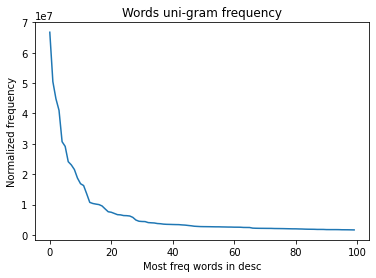

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Words uni-gram frequency")
plt.xlabel("Most freq words in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# Bi-gram words
with open('/content/drive/My Drive/word_bigram_unsorted', 'rb') as word_bigram_unsorted_file:
    word_bigram_dict = pickle.load(word_bigram_unsorted_file)

In [ ]:
tempdict = {key:val for key, val in word_bigram_dict.items() if key.find('।')==-1 and key.find('.')==-1 and key.find(',')==-1}
# not in ['।',',','.','-','"',"'",'(',')',':']
word_bigram_dict = tempdict

In [ ]:
c = Counter(word_bigram_dict)
c = c.most_common(100)
c

[('के लिए', 9123415),
 ('है कि', 5274931),
 ('के साथ', 3832249),
 ('कहा कि', 3380982),
 ('के बाद', 3084349),
 ('रहा है', 2538576),
 ('ने कहा', 2486124),
 ('गया है', 2343733),
 ('रहे हैं', 2183022),
 ('है और', 2118392),
 ('करने के', 1874692),
 ('रही है', 1847323),
 ('जाता है', 1563678),
 ('किया गया', 1465801),
 ('सकता है', 1392690),
 ('नहीं है', 1374148),
 ('बताया कि', 1348942),
 ('होता है', 1337458),
 ('कर दिया', 1310192),
 ('किया है', 1277417),
 ('को लेकर', 1269942),
 ('सकते हैं', 1235771),
 ('उन्होंने कहा', 1203491),
 ('बारे में', 1111275),
 ('के खिलाफ', 1103855),
 ('के बीच', 1087953),
 ('के दौरान', 1073968),
 ('करते हुए', 1031273),
 ('कर रहे', 1012193),
 ('जा रहा', 998565),
 ('हैं और', 985108),
 ('में भी', 980955),
 ('गई है', 974204),
 ('ने बताया', 972132),
 ('में एक', 968281),
 ('की है', 915468),
 ('साथ ही', 915153),
 ('करने की', 910024),
 ('दिया है', 879481),
 ('के अनुसार', 870463),
 ('के बारे', 857681),
 ('है तो', 853140),
 ('करते हैं', 849965),
 ('था कि', 841113),
 ('हैं कि', 83

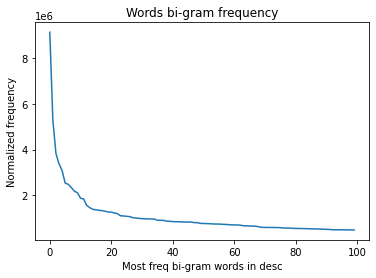

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Words bi-gram frequency")
plt.xlabel("Most freq bi-gram words in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# Tri-gram words
with open('/content/drive/My Drive/word_trigram_unsorted', 'rb') as word_trigram_unsorted_file:
    word_trigram_dict = pickle.load(word_trigram_unsorted_file)

In [ ]:
tempdict = {key:val for key, val in word_trigram_dict.items() if key.find('।')==-1 and key.find('.')==-1 and key.find(',')==-1 and key.find('-')==-1  and key.find('(')==-1  and key.find(')')==-1 }
# not in ['।',',','.','-','"',"'",'(',')',':']
word_trigram_dict = tempdict

In [ ]:
c = Counter(word_trigram_dict)
c = c.most_common(100)
c

[('ने कहा कि', 1509684),
 ('करने के लिए', 1094800),
 ('उन्होंने कहा कि', 877246),
 ('जा रहा है', 845578),
 ('ने बताया कि', 833574),
 ('के बारे में', 832518),
 ('के रूप में', 695924),
 ('कर रहे हैं', 633986),
 ('किया गया है', 551015),
 ('कहना है कि', 520610),
 ('जा सकता है', 489536),
 ('का कहना है', 477056),
 ('कर सकते हैं', 460410),
 ('जा रही है', 438071),
 ('की ओर से', 433157),
 ('बता दें कि', 386253),
 ('की वजह से', 364376),
 ('हो सकता है', 360345),
 ('कहा है कि', 351581),
 ('दिया गया है', 338737),
 ('कर रही है', 322846),
 ('कर दिया है', 301720),
 ('हुए कहा कि', 289869),
 ('यह है कि', 287844),
 ('रहा है कि', 285162),
 ('के माध्यम से', 280629),
 ('हो रहा है', 279014),
 ('हो गया है', 271251),
 ('के आधार पर', 261379),
 ('के मामले में', 261123),
 ('किया जाता है', 259429),
 ('हाल ही में', 252255),
 ('इस मामले में', 252164),
 ('गया है कि', 250766),
 ('के लिए एक', 249680),
 ('कर रहा है', 248134),
 ('कर दिया गया', 243053),
 ('जा रहे हैं', 241691),
 ('के तौर पर', 238809),
 ('किया जा रहा', 238

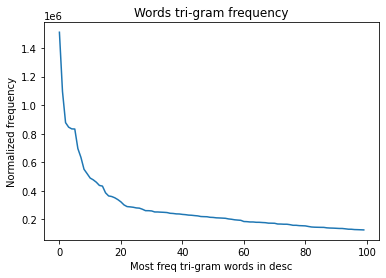

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Words tri-gram frequency")
plt.xlabel("Most freq tri-gram words in desc")
plt.ylabel("Normalized frequency")
plt.show()

##Q3 (a) - characters

In [ ]:
# Method to fix halant character for every word. 
# Consonants now considered as halant representations followed by vowels
def fix_halank(word):
    consonants=['क','ख','ग','घ','ड़','च','छ','ज','झ','ञ','ट','ठ','ड','ढ','ण', 'त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व', 'श','ष','स','ह']
    wordlist=[]
    wordlist.append(word[0])
    for i in range(1, len(word)):   
        if (word[i] in consonants) and (word[i-1] in consonants):
            wordlist.append('अ')
        wordlist.append(word[i])
    if word[-1] in consonants:
        wordlist.append('अ')
    wordlist2 = ([s for s in wordlist if s != '्'])
    word = ''.join(wordlist2)
    return(word)

In [ ]:
# UNIGRAM CHAR
lang='hi'
unichardict = {}
for key, val in word_unigram_dict.items():
    word = fix_halank(key)
    # syllables = ' '.join(syllabifier.orthographic_syllabify(key, lang))
    for ch in word:
        if ch in unichardict.keys():
            unichardict[ch] += val
        else:
            unichardict[ch] = val

In [ ]:
tempdict = {key:val for key, val in unichardict.items() if not key.isnumeric()}
unichardict = tempdict

In [ ]:
c = Counter(unichardict)
c = c.most_common(100)
c

[('अ', 1417441103),
 ('ा', 569640063),
 ('क', 460090431),
 ('र', 433401909),
 ('े', 421407458),
 ('ी', 275060852),
 ('न', 273817830),
 ('स', 263793996),
 ('ि', 255196619),
 ('ं', 247476244),
 ('ह', 236316313),
 ('म', 216133566),
 ('त', 201477559),
 ('ल', 187353301),
 ('ो', 177224528),
 ('प', 165467563),
 ('य', 153972631),
 ('व', 126562600),
 ('द', 124751112),
 ('ज', 114390745),
 ('ब', 107245903),
 ('ग', 97805584),
 ('ै', 87340850),
 ('ु', 86685718),
 ('ट', 63718941),
 ('श', 60525647),
 ('ए', 58622087),
 ('च', 55213376),
 ('ड', 48571917),
 ('भ', 47605802),
 ('आ', 42716032),
 ('ू', 42324106),
 ('इ', 38135950),
 ('थ', 37606894),
 ('ख', 34507580),
 ('उ', 33099954),
 ('ध', 32707720),
 ('़', 29735182),
 ('फ', 29164156),
 ('ष', 25653824),
 ('ई', 25043090),
 ('औ', 24700420),
 ('ण', 18100178),
 ('ौ', 13145642),
 ('छ', 12800626),
 ('ठ', 8773131),
 ('घ', 8539886),
 ('ॉ', 8410824),
 ('ओ', 7395987),
 ('e', 7310732),
 ('a', 6464533),
 ('ढ', 6456547),
 ('i', 5820474),
 ('o', 5198873),
 ('ृ', 4983141)

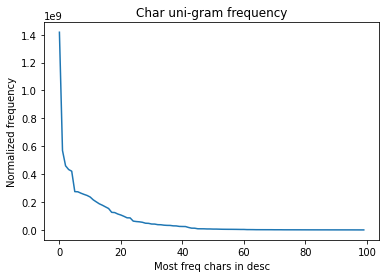

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Char uni-gram frequency")
plt.xlabel("Most freq chars in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# BIGRAM CHAR
lang='hi'
bichardict = {}
for key, val in word_unigram_dict.items():
    word = fix_halank(key)
    for i in range(1, len(word)):
        ch = word[i-1] + word[i]
        if ch in bichardict.keys():
            bichardict[ch] += val
        else:
            bichardict[ch] = val

In [ ]:
c = Counter(bichardict)
c = c.most_common(100)
c

[('रअ', 240520148),
 ('अर', 160306281),
 ('कअ', 123265431),
 ('सअ', 105392984),
 ('नअ', 102951203),
 ('अन', 87472693),
 ('के', 85218806),
 ('पअ', 82582731),
 ('अह', 81381210),
 ('तअ', 72415093),
 ('ें', 71775221),
 ('ार', 71592655),
 ('अक', 69653080),
 ('ने', 68519305),
 ('लअ', 66800829),
 ('मअ', 65031421),
 ('का', 64597107),
 ('है', 62624045),
 ('मे', 62096542),
 ('अत', 61929535),
 ('या', 60778332),
 ('हअ', 57834609),
 ('यअ', 56743966),
 ('बअ', 50083089),
 ('की', 49573242),
 ('अल', 48390275),
 ('वअ', 46194826),
 ('अम', 45447257),
 ('से', 45352601),
 ('ों', 44504100),
 ('ान', 43873599),
 ('जअ', 43684697),
 ('को', 42687942),
 ('कि', 41987111),
 ('गअ', 41162787),
 ('रा', 40593788),
 ('ता', 37473056),
 ('दअ', 37456716),
 ('िय', 36776038),
 ('ना', 35181107),
 ('वा', 34027878),
 ('री', 31615402),
 ('मा', 29930813),
 ('टअ', 29743978),
 ('ही', 28560695),
 ('अस', 28363774),
 ('ला', 28290350),
 ('ाल', 27726820),
 ('ले', 27354623),
 ('हा', 26621306),
 ('सा', 26442434),
 ('जा', 26238077),
 ('शअ',

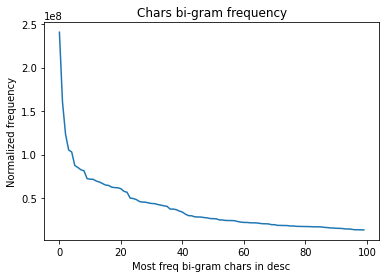

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Chars bi-gram frequency")
plt.xlabel("Most freq bi-gram chars in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# TRIGRAM CHAR
lang='hi'
trichardict = {}
for key, val in word_unigram_dict.items():
    word = fix_halank(key)
    for i in range(2, len(word)):
        ch = word[i-2] + word[i-1] + word[i]
        if ch in trichardict.keys():
            trichardict[ch] += val
        else:
            trichardict[ch] = val

In [ ]:
c = Counter(trichardict)
c = c.most_common(100)
c

[('अरअ', 100473788),
 ('में', 54591626),
 ('कअर', 44655904),
 ('ारअ', 37227596),
 ('अहअ', 31413155),
 ('पअर', 28127856),
 ('अनअ', 27492187),
 ('अकअ', 24255208),
 ('औरअ', 24202560),
 ('ानअ', 22994031),
 ('अने', 22683939),
 ('िया', 22536703),
 ('अलअ', 20795887),
 ('अमअ', 19842764),
 ('रअह', 18967603),
 ('अही', 18459200),
 ('अहा', 18177818),
 ('कार', 18101862),
 ('परअ', 18021871),
 ('अना', 17913687),
 ('इसअ', 17363846),
 ('हैं', 17006822),
 ('अता', 16220643),
 ('रअत', 15540882),
 ('अतअ', 15535065),
 ('सअक', 14734264),
 ('ालअ', 14019720),
 ('अका', 13156868),
 ('सअम', 12658237),
 ('ामअ', 12568364),
 ('अबअ', 12137447),
 ('पअन', 12123283),
 ('अपअ', 12108851),
 ('िकअ', 12011197),
 ('हीं', 11883042),
 ('ितअ', 11579759),
 ('लिए', 11349824),
 ('एकअ', 11342130),
 ('रअन', 11062355),
 ('अवा', 10719659),
 ('नअह', 10671470),
 ('सअर', 10584536),
 ('रअक', 10335868),
 ('ेशअ', 10196040),
 ('अड़', 10058639),
 ('अके', 10018378),
 ('कअह', 9870338),
 ('अगअ', 9782671),
 ('ादअ', 9658769),
 ('यों', 9469991),
 ('

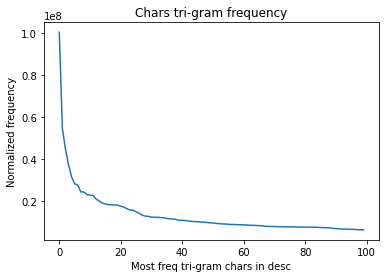

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Chars tri-gram frequency")
plt.xlabel("Most freq tri-gram chars in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# QUADGRAM CHAR
lang='hi'
quadchardict = {}
for key, val in word_unigram_dict.items():
    word = fix_halank(key)
    for i in range(3, len(word)):
        ch = word[i-3] + word[i-2] + word[i-1] + word[i]
        if ch in quadchardict.keys():
            quadchardict[ch] += val
        else:
            quadchardict[ch] = val

In [ ]:
c = Counter(quadchardict)
c = c.most_common(100)
c

[('कअरअ', 33795942),
 ('पअरअ', 20799545),
 ('अहीं', 11711613),
 ('नअही', 10409156),
 ('अरअन', 9563016),
 ('अपअन', 8843901),
 ('कारअ', 8578965),
 ('किया', 7816149),
 ('अकार', 7448166),
 ('रअने', 7184399),
 ('कअहा', 6963461),
 ('तअरअ', 6690396),
 ('यअहअ', 6604599),
 ('ियों', 6473325),
 ('गअया', 6395883),
 ('सअरअ', 6376186),
 ('देशअ', 5903178),
 ('बादअ', 5831570),
 ('साथअ', 5800691),
 ('रअका', 5799901),
 ('सअके', 5537357),
 ('रअहअ', 5392393),
 ('सअमअ', 5370086),
 ('रअहे', 5205136),
 ('अरअत', 5195266),
 ('अरअक', 5162034),
 ('तअकअ', 5152880),
 ('पअहअ', 5141845),
 ('पअने', 4878617),
 ('अकअत', 4858399),
 ('सअकअ', 4810317),
 ('भारअ', 4658429),
 ('ारअत', 4635185),
 ('उनअक', 4586336),
 ('अहअल', 4574168),
 ('वारअ', 4547540),
 ('दिया', 4510836),
 ('रअणअ', 4432966),
 ('रअतअ', 4428498),
 ('अकअर', 4349489),
 ('रअहा', 4145628),
 ('जअनअ', 4099029),
 ('इसअक', 4055451),
 ('हअरअ', 4014541),
 ('शअनअ', 3972031),
 ('मंतर', 3935067),
 ('मानअ', 3933885),
 ('रअही', 3889136),
 ('टअरअ', 3792958),
 ('पअनी', 379107

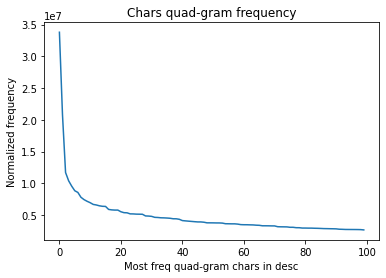

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Chars quad-gram frequency")
plt.xlabel("Most freq quad-gram chars in desc")
plt.ylabel("Normalized frequency")
plt.show()

##Q3 (c) - syllables

In [ ]:
def syllables_composition(word):
    word = fix_halank(word)
    syllables = []
    syll = []
    vowels=['अ','आ','इ','ई','उ','ऊ','ऋ','ए','ऐ','ओ','औ','अं','अः','ऻ','ि','ी','ू','ृ','ॄ','ॅ','ॆ','े', 'ं', 'ै','ॉ','ॊ','ो','ौ','्','ॎ','ॏ','ु']
    for ch in word:
        if ch in vowels:
            syll.append(ch)
            syllables.append(''.join(syll))
            syll = []
        else:
            syll.append(ch)
    return syllables

In [ ]:
print(syllables_composition('जगदीशचंद्र'))

['जअ', 'गअ', 'दी', 'शअ', 'चं', 'दरअ']


In [ ]:
# UNIGRAM SYLLABLE
unisylldict = {}

for key, val in word_unigram_dict.items():
    syllables = syllables_composition(key)
    for i in range(len(syllables)):
        syll_combo = syllables[i]
        if syll_combo in unisylldict.keys():
            unisylldict[syll_combo] += val
        else:
            unisylldict[syll_combo] = val

In [ ]:
c = Counter(unisylldict)
c = c.most_common(100)
c

[('ं', 183986541),
 ('रअ', 169436118),
 ('कअ', 116935147),
 ('सअ', 92043553),
 ('के', 84128566),
 ('नअ', 77445630),
 ('पअ', 77127960),
 ('है', 62586942),
 ('मे', 61009862),
 ('ने', 59556908),
 ('तअ', 55489455),
 ('लअ', 51948303),
 ('हअ', 51825399),
 ('अ', 51503682),
 ('की', 48608287),
 ('ए', 46549188),
 ('बअ', 46219755),
 ('मअ', 46092069),
 ('से', 44862373),
 ('आ', 42067676),
 ('को', 42003218),
 ('कि', 39131318),
 ('गअ', 35847563),
 ('जअ', 34298587),
 ('इ', 31957296),
 ('उ', 31754750),
 ('वअ', 31569547),
 ('यअ', 29965113),
 ('ही', 27432946),
 ('दअ', 26033688),
 ('औ', 24698536),
 ('ले', 22418444),
 ('शअ', 21909278),
 ('लि', 21218683),
 ('हो', 20355244),
 ('वि', 20059745),
 ('टअ', 19945917),
 ('भी', 18462889),
 ('परअ', 17912268),
 ('दे', 17213959),
 ('दि', 16874773),
 ('चअ', 15793289),
 ('नि', 15624806),
 ('ते', 13536901),
 ('री', 13469371),
 ('यो', 13341204),
 ('सी', 13105850),
 ('हु', 12823266),
 ('रे', 12272397),
 ('रि', 11985574),
 ('ती', 11934255),
 ('सं', 11822196),
 ('ति', 1172809

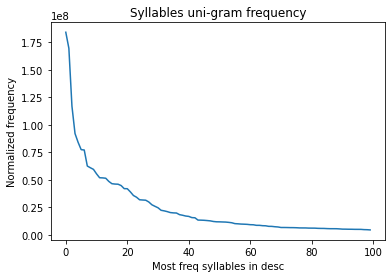

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Syllables uni-gram frequency")
plt.xlabel("Most freq syllables in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# BIGRAM SYLLABLE
bisylldict = {}
for key, val in word_unigram_dict.items():
    syllables = syllables_composition(key)
    for i in range(1, len(syllables)):
        syll_combo = syllables[i-1] + syllables[i]
        if syll_combo in bisylldict.keys():
            bisylldict[syll_combo] += val
        else:
            bisylldict[syll_combo] = val

In [ ]:
c = Counter(bisylldict)
c = c.most_common(100)
c

[('में', 54293853),
 ('कअरअ', 31264983),
 ('औरअ', 24202289),
 ('पअरअ', 20627191),
 ('इसअ', 17235972),
 ('हैं', 17006261),
 ('हीं', 11735273),
 ('लिए', 11343845),
 ('एकअ', 11330278),
 ('नअही', 10407950),
 ('अपअ', 9344559),
 ('यों', 7004505),
 ('रअने', 6945123),
 ('यअहअ', 6604272),
 ('सअरअ', 6103241),
 ('आपअ', 6095313),
 ('उनअ', 5766309),
 ('उसअ', 5587699),
 ('सअके', 5537357),
 ('सअमअ', 5348163),
 ('देशअ', 5244347),
 ('रअहे', 5204626),
 ('पअहअ', 5141845),
 ('तअरअ', 4877664),
 ('तअकअ', 4876896),
 ('पअने', 4848076),
 ('रअहअ', 4761679),
 ('सअकअ', 4612705),
 ('ंने', 4388437),
 ('हुए', 4065754),
 ('रअही', 3865239),
 ('नहों', 3787663),
 ('पअनी', 3742925),
 ('नों', 3705551),
 ('जअनअ', 3701615),
 ('उनहो', 3644391),
 ('ंगअ', 3639949),
 ('किनअ', 3585921),
 ('हअमअ', 3570844),
 ('लेकि', 3493338),
 ('जिसअ', 3462310),
 ('अधि', 3452380),
 ('अं', 3439852),
 ('रअकारअ', 3402309),
 ('वअहअ', 3370060),
 ('इं', 3360416),
 ('जअबअ', 3305131),
 ('कुछअ', 3151787),
 ('ंगे', 3143332),
 ('पअरि', 3141083),
 ('सिं', 3

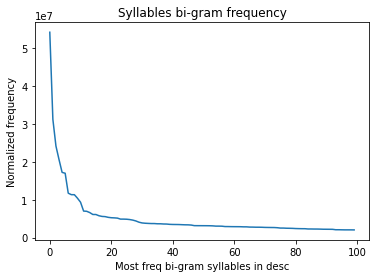

In [ ]:
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Syllables bi-gram frequency")
plt.xlabel("Most freq bi-gram syllables in desc")
plt.ylabel("Normalized frequency")
plt.show()

In [ ]:
# TRIGRAM SYLLABLE
trisylldict = {}
for key, val in word_unigram_dict.items():
    syllables = syllables_composition(key)
    for i in range(2, len(syllables)):
        syll_combo = syllables[i-2] + syllables[i-1] + syllables[i]
        if syll_combo in trisylldict.keys():
            trisylldict[syll_combo] += val
        else:
            trisylldict[syll_combo] = val

In [ ]:
c = Counter(trisylldict)
c = c.most_common(100)
c

[('नअहीं', 9998795),
 ('कअरअने', 6260800),
 ('अपअने', 4512674),
 ('नहोंने', 3771901),
 ('उनहों', 3563877),
 ('लेकिनअ', 3490760),
 ('सअरअकारअ', 3327031),
 ('पअहअले', 3012509),
 ('लोगों', 2759919),
 ('कअरअते', 2668882),
 ('अपअनी', 2666568),
 ('पुलिसअ', 2646555),
 ('सिंहअ', 2597432),
 ('इसअके', 2586113),
 ('तअरअहअ', 2242244),
 ('सअमअयअ', 2177384),
 ('लेकअरअ', 2160945),
 ('उनअके', 2087453),
 ('कअरें', 1982909),
 ('सअमें', 1920052),
 ('उनहें', 1904801),
 ('परअदेशअ', 1812165),
 ('पअहुं', 1786709),
 ('बअहुतअ', 1691644),
 ('कांगरेसअ', 1634788),
 ('सअकअते', 1634094),
 ('सअबअसे', 1545539),
 ('भारअतीयअ', 1468116),
 ('उसअके', 1466501),
 ('उनअकी', 1429665),
 ('दोनों', 1381581),
 ('अगअरअ', 1369188),
 ('आपअको', 1318998),
 ('अधिकअ', 1304704),
 ('रुपअये', 1198648),
 ('इसअसे', 1144912),
 ('वअहीं', 1107110),
 ('अधयअकषअ', 1046041),
 ('मुखयअमं', 1043639),
 ('खयअमंतरी', 1019578),
 ('कंपअनी', 1015134),
 ('पिछअले', 974732),
 ('अलअगअ', 974497),
 ('अंतअ', 951944),
 ('अनुसारअ', 949935),
 ('सअकअती', 945911),
 ('क

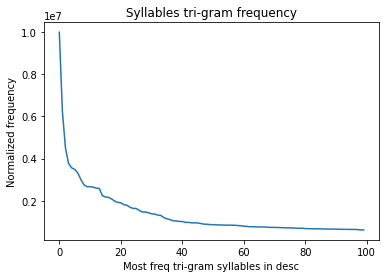

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y = []
for i in c:
    y.append(i[1])
ypoints = np.array(y)
plt.plot(ypoints)
plt.title("Syllables tri-gram frequency")
plt.xlabel("Most freq tri-gram syllables in desc")
plt.ylabel("Normalized frequency")
plt.show()